APARTADO 1: DESCRIPCIÓN DEL DATASET DE PELÍCULAS (1980-1989)
Mounted at /content/drive

CARGA Y EXPLORACIÓN INICIAL
--------------------------------------------------
Dimensiones del dataset: 300 filas × 16 columnas
Período temporal: 1980 - 1989
Memoria utilizada: 465.4 KB

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   titulo_original  300 non-null    object 
 1   anio             300 non-null    int64  
 2   duracion         300 non-null    object 
 3   pais             300 non-null    object 
 4   direccion        300 non-null    object 
 5   guion            300 non-null    object 
 6   reparto          300 non-null    object 
 7   genero           300 non-null    object 
 8   sinopsis         300 non-null    object 
 9   url_imagen       300 non-null    object 
 10  puntuacion       300 non-null 

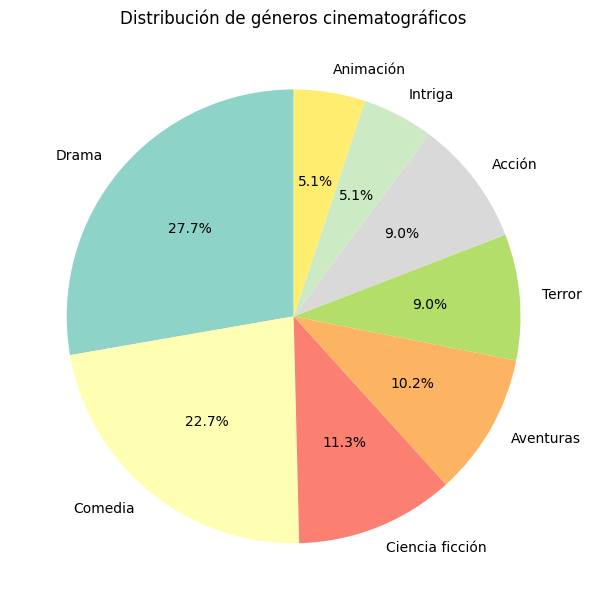


ANÁLISIS GEOGRÁFICO
--------------------------------------------------
DISTRIBUCIÓN POR PAÍSES (Top 10):
Estados Unidos: 210 películas (70.0%)
Reino Unido: 25 películas (8.3%)
España: 23 películas (7.7%)
Japón: 9 películas (3.0%)
Alemania del Oeste (RFA): 7 películas (2.3%)
Canadá: 7 películas (2.3%)
Australia: 6 películas (2.0%)
Francia: 5 películas (1.7%)
Italia: 3 películas (1.0%)
Botswana: 1 películas (0.3%)

Total de países representados: 14

ANÁLISIS DE PUNTUACIONES CRÍTICAS
--------------------------------------------------
ESTADÍSTICAS DE PUNTUACIONES:
Media FilmAffinity: 6.63
Media IMDb: 7.14
Diferencia promedio: -0.51
Correlación entre puntuaciones: 0.875


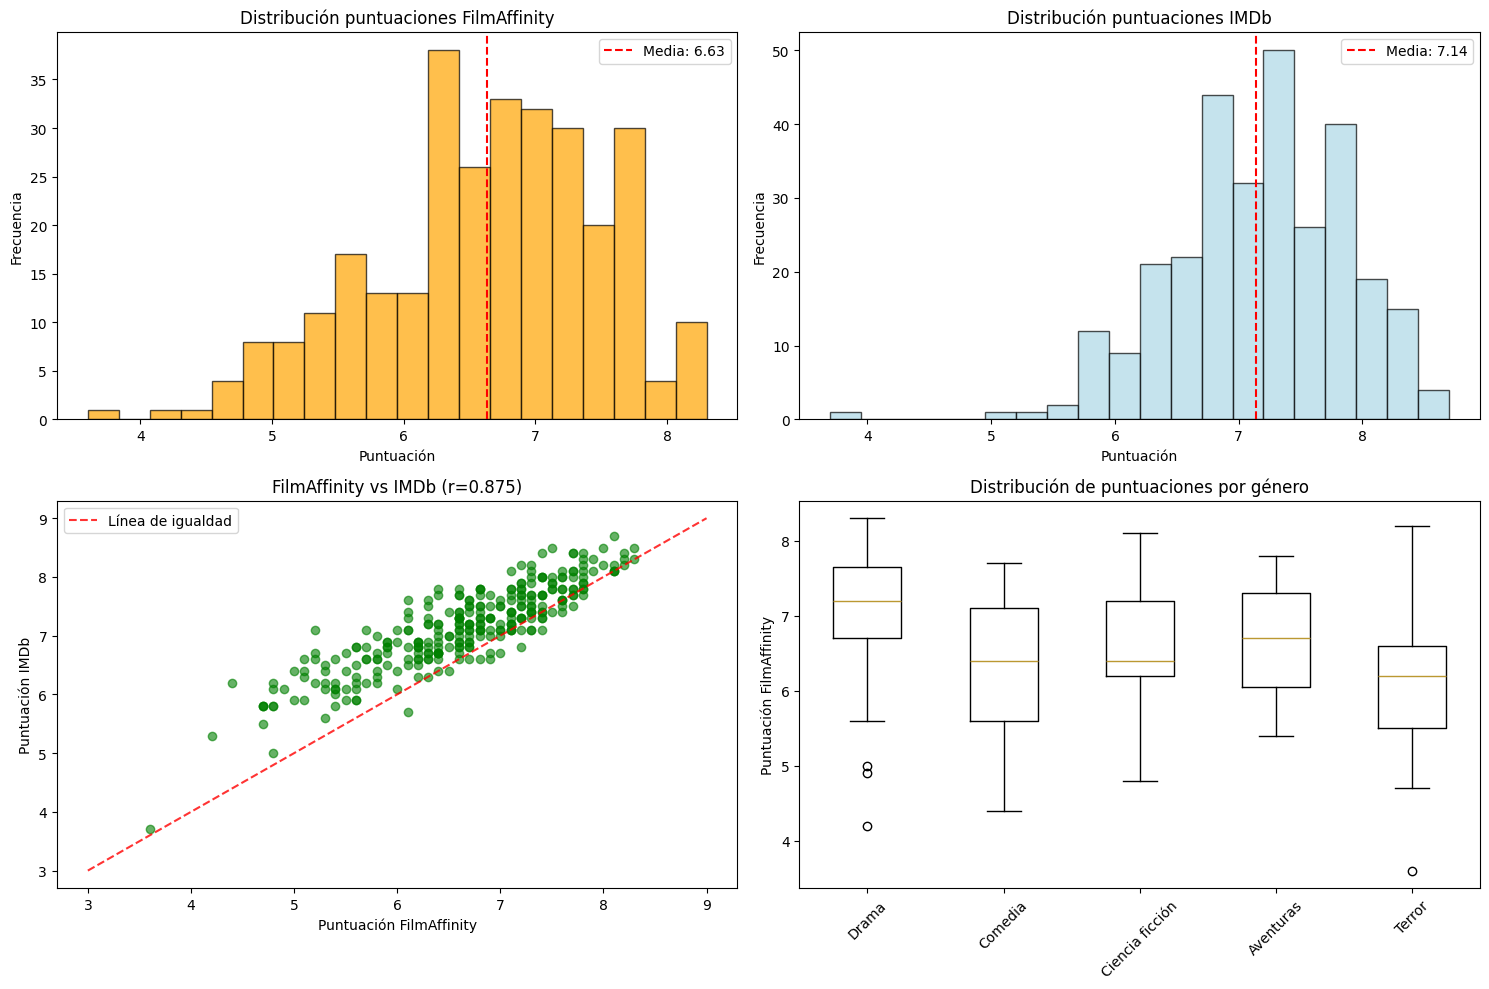


RESUMEN EJECUTIVO DEL DATASET
DIMENSIONES: 300 películas × 16 variables
PERÍODO: 1980-1989 (década completa)
COBERTURA: 14 países
GÉNEROS: 15 géneros diferentes
DIRECTORES: 176 directores únicos
COMPLETITUD: 99.96% de datos completos
PUNTUACIÓN MEDIA: 6.63 (FilmAffinity)
PUNTUACIÓN MEDIA: 7.14 (IMDb)
CORRELACIÓN FA-IMDb: 0.875


In [1]:
# ============================================================================
# APARTADO 1: DESCRIPCIÓN DEL DATASET
# Análisis exploratorio del dataset de películas de los años 80
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("="*70)
print("APARTADO 1: DESCRIPCIÓN DEL DATASET DE PELÍCULAS (1980-1989)")
print("="*70)

# ============================================================================
# CARGA Y EXPLORACIÓN DEL DATASET
# ============================================================================

# Montar Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Cargar el dataset
df_original = pd.read_csv("/content/drive/MyDrive/Tipología/PR2/datasets/peliculas_filmaffinity_1980-1989_imdb.csv",
                         sep=';', encoding='utf-8')

print("\nCARGA Y EXPLORACIÓN INICIAL")
print("-" * 50)
print(f"Dimensiones del dataset: {df_original.shape[0]} filas × {df_original.shape[1]} columnas")
print(f"Período temporal: {df_original['anio'].min()} - {df_original['anio'].max()}")
print(f"Memoria utilizada: {df_original.memory_usage(deep=True).sum() / 1024:.1f} KB")

# Información general del dataset
print("\nInformación general del dataset:")
print(df_original.info())

# ============================================================================
# ANÁLISIS DE VARIABLES
# ============================================================================

print("\nCLASIFICACIÓN DE VARIABLES")
print("-" * 50)

# Clasificar variables por tipo
variables_numericas = ['anio', 'puntuacion', 'votos', 'imdb_puntuacion', 'imdb_votos']
variables_categoricas = ['genero', 'pais', 'direccion', 'guion', 'reparto']
variables_texto = ['titulo_original', 'duracion', 'sinopsis']
variables_url = ['url', 'url_imagen', 'imdb_url']

print("VARIABLES NUMÉRICAS:")
for var in variables_numericas:
    if var in df_original.columns:
        print(f"{var}: {df_original[var].dtype}")

print("\nVARIABLES CATEGÓRICAS:")
for var in variables_categoricas:
    if var in df_original.columns:
        valores_unicos = df_original[var].nunique()
        print(f"{var}: {valores_unicos} valores únicos")

print("\nVARIABLES DE TEXTO:")
for var in variables_texto:
    if var in df_original.columns:
        print(f"{var}: {df_original[var].dtype}")

print("\nVARIABLES DE REFERENCIA (URLs):")
for var in variables_url:
    if var in df_original.columns:
        print(f"{var}: Enlace de referencia")

# ============================================================================
# ANÁLISIS DE COMPLETITUD
# ============================================================================

print("\nANÁLISIS DE COMPLETITUD")
print("-" * 50)

# Datos faltantes por variable
datos_faltantes = df_original.isnull().sum()
porcentaje_faltantes = (datos_faltantes / len(df_original)) * 100

completitud_df = pd.DataFrame({
    'Variable': datos_faltantes.index,
    'Datos_Faltantes': datos_faltantes.values,
    'Porcentaje': porcentaje_faltantes.values
}).sort_values('Datos_Faltantes', ascending=False)

print("DATOS FALTANTES POR VARIABLE:")
print(completitud_df[completitud_df['Datos_Faltantes'] > 0])

total_datos = df_original.shape[0] * df_original.shape[1]
total_faltantes = datos_faltantes.sum()
completitud_general = ((total_datos - total_faltantes) / total_datos) * 100

print(f"\nCOMPLETITUD GENERAL DEL DATASET: {completitud_general:.2f}%")
print(f"Total de datos: {total_datos:,}")
print(f"Datos faltantes: {total_faltantes}")

# ============================================================================
# ANÁLISIS DESCRIPTIVO DE VARIABLES NUMÉRICAS
# ============================================================================

print("\nESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("-" * 50)

# Estadísticas descriptivas
estadisticas = df_original[variables_numericas].describe()
print(estadisticas.round(2))

# Rangos específicos mencionados en la memoria
print("\nRANGOS IDENTIFICADOS:")
print(f"Puntuación FilmAffinity: {df_original['puntuacion'].min()} - {df_original['puntuacion'].max()}")
print(f"Puntuación IMDb: {df_original['imdb_puntuacion'].min():.1f} - {df_original['imdb_puntuacion'].max():.1f}")
print(f"Votos FilmAffinity: {df_original['votos'].min():,} - {df_original['votos'].max():,}")
print(f"Votos IMDb: {df_original['imdb_votos'].min():,} - {df_original['imdb_votos'].max():,}")

# ============================================================================
# ANÁLISIS DE GÉNEROS
# ============================================================================

print("\nANÁLISIS DE GÉNEROS")
print("-" * 50)

# Distribución por géneros
distribucion_generos = df_original['genero'].value_counts()
print("DISTRIBUCIÓN POR GÉNEROS:")
for genero, cantidad in distribucion_generos.items():
    porcentaje = (cantidad / len(df_original)) * 100
    print(f" {genero}: {cantidad} películas ({porcentaje:.1f}%)")

# Gráfico de géneros
plt.subplot(1, 2, 2)
top_generos = distribucion_generos.head(8)
colors = plt.cm.Set3(np.linspace(0, 1, len(top_generos)))
plt.pie(top_generos.values, labels=top_generos.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('Distribución de géneros cinematográficos')

plt.tight_layout()
plt.savefig('distribucion_temporal_generos.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# ANÁLISIS DE PAÍSES DE PRODUCCIÓN
# ============================================================================

print("\nANÁLISIS GEOGRÁFICO")
print("-" * 50)

# Distribución por países
distribucion_paises = df_original['pais'].value_counts()
print("DISTRIBUCIÓN POR PAÍSES (Top 10):")
for pais, cantidad in distribucion_paises.head(10).items():
    porcentaje = (cantidad / len(df_original)) * 100
    print(f"{pais}: {cantidad} películas ({porcentaje:.1f}%)")

print(f"\nTotal de países representados: {df_original['pais'].nunique()}")

# ============================================================================
# ANÁLISIS DE PUNTUACIONES CRÍTICAS
# ============================================================================

print("\nANÁLISIS DE PUNTUACIONES CRÍTICAS")
print("-" * 50)

# Estadísticas de puntuaciones
print("ESTADÍSTICAS DE PUNTUACIONES:")
print(f"Media FilmAffinity: {df_original['puntuacion'].mean():.2f}")
print(f"Media IMDb: {df_original['imdb_puntuacion'].mean():.2f}")
print(f"Diferencia promedio: {(df_original['puntuacion'] - df_original['imdb_puntuacion']).mean():.2f}")

# Correlación entre puntuaciones
correlacion = df_original['puntuacion'].corr(df_original['imdb_puntuacion'])
print(f"Correlación entre puntuaciones: {correlacion:.3f}")

# Crear gráficos de distribución de puntuaciones
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograma FilmAffinity
axes[0,0].hist(df_original['puntuacion'], bins=20, alpha=0.7, color='orange', edgecolor='black')
axes[0,0].set_title('Distribución puntuaciones FilmAffinity')
axes[0,0].set_xlabel('Puntuación')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].axvline(df_original['puntuacion'].mean(), color='red', linestyle='--',
                  label=f'Media: {df_original["puntuacion"].mean():.2f}')
axes[0,0].legend()

# Histograma IMDb
axes[0,1].hist(df_original['imdb_puntuacion'].dropna(), bins=20, alpha=0.7,
               color='lightblue', edgecolor='black')
axes[0,1].set_title('Distribución puntuaciones IMDb')
axes[0,1].set_xlabel('Puntuación')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].axvline(df_original['imdb_puntuacion'].mean(), color='red', linestyle='--',
                  label=f'Media: {df_original["imdb_puntuacion"].mean():.2f}')
axes[0,1].legend()

# Scatter plot comparativo
axes[1,0].scatter(df_original['puntuacion'], df_original['imdb_puntuacion'],
                  alpha=0.6, color='green')
axes[1,0].set_title(f'FilmAffinity vs IMDb (r={correlacion:.3f})')
axes[1,0].set_xlabel('Puntuación FilmAffinity')
axes[1,0].set_ylabel('Puntuación IMDb')
axes[1,0].plot([3, 9], [3, 9], 'r--', alpha=0.8, label='Línea de igualdad')
axes[1,0].legend()

# Boxplot por género (top 5)
top5_generos = distribucion_generos.head(5).index
df_top5 = df_original[df_original['genero'].isin(top5_generos)]
axes[1,1].boxplot([df_top5[df_top5['genero']==genero]['puntuacion'].values
                   for genero in top5_generos],
                  labels=top5_generos)
axes[1,1].set_title('Distribución de puntuaciones por género')
axes[1,1].set_ylabel('Puntuación FilmAffinity')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('analisis_puntuaciones.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# RESUMEN EJECUTIVO
# ============================================================================

print("\nRESUMEN EJECUTIVO DEL DATASET")
print("=" * 50)
print(f"DIMENSIONES: {df_original.shape[0]} películas × {df_original.shape[1]} variables")
print(f"PERÍODO: {df_original['anio'].min()}-{df_original['anio'].max()} (década completa)")
print(f"COBERTURA: {df_original['pais'].nunique()} países")
print(f"GÉNEROS: {df_original['genero'].nunique()} géneros diferentes")
print(f"DIRECTORES: {df_original['direccion'].nunique()} directores únicos")
print(f"COMPLETITUD: {completitud_general:.2f}% de datos completos")
print(f"PUNTUACIÓN MEDIA: {df_original['puntuacion'].mean():.2f} (FilmAffinity)")
print(f"PUNTUACIÓN MEDIA: {df_original['imdb_puntuacion'].mean():.2f} (IMDb)")
print(f"CORRELACIÓN FA-IMDb: {correlacion:.3f}")